### Libraries

In [84]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from scipy import stats

# @hidden
import pandas as pd
import numpy as np
import os
import pickle
import time
from collections import Counter
from io import BytesIO
import requests
import warnings
warnings.filterwarnings("ignore")

# import sklearn packages for modelling
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import missingno as msno
from sklearn.inspection import permutation_importance
from sklearn import metrics
import category_encoders as ce
from random import randint
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix

# Import ML-Classifiers
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Data Visualization set up
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image, display
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
%config InlineBackend.figure_format='retina'

#setting max number of columns to be displayed to 100, to get a better view.
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

### 1. Data Processing

#### 1.1. Data Import

In [53]:
cols = ["region", "townsize", "gender", "agecat", "edcat", "jobcat", "marital", "spousedcat", "empcat", "retire", 
"lninc", "debtinc", "inccat", "lncreddebt", "lnothdebt", "carcatvalue", "telecommute", "cardmon", "wiremon", "multline", 
"voice", "internet", "callwait", "forward", "confer", "reason", "cardspent", "churn", "tenure", "longmon", "tollmon", 
"ownpc", "owntv","ebill", "reside", "hometype", "addresscat", "custid", 'response_01', 'response_02', 'response_03']

In [54]:
url = 'https://raw.githubusercontent.com/ThomasD96/University_Repo/master/Nova_SBE/Big_Data_Analysis/Case_01/bda_case_01.csv'

In [55]:
df = pd.read_csv(url, usecols = cols)
df['response_01'] = df['response_01'].map({'Yes': 1, 'No': 0})
df['response_02'] = df['response_02'].map({'Yes': 1, 'No': 0})
df['response_03'] = df['response_03'].map({'Yes': 1, 'No': 0})
df['spousedcat'] = df['spousedcat'].fillna(df['spousedcat'].mode()[0])
df['carcatvalue'] = df['carcatvalue'].fillna(df['carcatvalue'].mode()[0])
df['townsize'] = df['townsize'].fillna(df['townsize'].mode()[0])
df['lncreddebt'] = df['lncreddebt'].fillna(df['lncreddebt'].mode()[0])
df['lnothdebt'] = df['lnothdebt'].fillna(df['lnothdebt'].mode()[0])
df = df.drop('reason', 1)

#### 1.2. Target Encoding

In [56]:
target_col = []
for a,b,c in zip(df['response_01'], df['response_02'], df['response_03']):
    # append 0
    if (a == 0 and b == 0 and c == 0):
        target_col.append(0)
        
    # append 1
    elif (a == 1 and b == 0 and c == 0):
        target_col.append(0)
        
    # append 2
    elif (a == 0 and b == 1 and c == 0):
        target_col.append(0)
        
    # append 3
    elif (a == 0 and b == 0 and c == 1):
        target_col.append(1)
        
    # append 4
    elif (a == 1 and b == 1 and c == 0):
        target_col.append(0)
        
    # append 5
    elif (a == 1 and b == 0 and c == 1):
        target_col.append(1)
        
    # append 6
    elif (a == 0 and b == 1 and c == 1):
        target_col.append(1) 
        
    # append 7
    elif (a == 1 and b == 1 and c == 1):
        target_col.append(1)
        
    else:
        target_col.append('NaN')
        
df['target'] = target_col

#### 1.3. Check Target distribution

In [57]:
non_responses = df.target.value_counts()[0]
responses = df.target.value_counts()[1]
combined_df = df.shape[0]
non_responses_in_data = round((non_responses/combined_df)*100,2)
responses_in_data = round((responses/combined_df)*100,2)
print ('Non-Responses in original dataset: {}%'.format(non_responses_in_data))
print ('Respones in original dataset: {}%'.format(responses_in_data))

Non-Responses in original dataset: 92.07%
Respones in original dataset: 7.92%


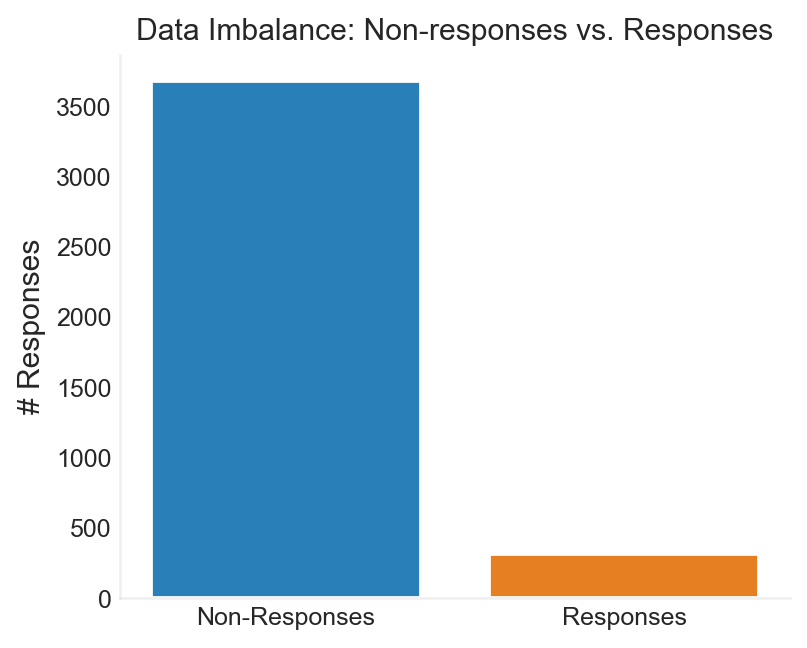

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(4.8,4), dpi= 90)
x_values = [0, 1]
labels = ['Non-Responses', 'Responses']
gender_dist = df.groupby('target').apply(lambda x:x['custid'].count()).reset_index(name='Counts')
plt.bar(gender_dist['target'], gender_dist['Counts'],color=['#2980b9', '#e67e22'])
plt.ylabel('# Responses',size=12)
plt.title('Data Imbalance: Non-responses vs. Responses',size=12)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(x_values, labels)
plt.show();

#### 1.4. Outlier Detection

In [59]:
df_numeric = df.select_dtypes(include='number').drop(['response_01', 'response_02', 'response_03', 'target'], axis=1)
z = np.abs(stats.zscore(df_numeric))
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df_box = df_numeric[~((df_numeric < (Q1 - 3 * IQR)) |(df_numeric > (Q3 + 3 * IQR))).any(axis=1)]
df = df_box.merge((df), how = "inner")

In [60]:
df.shape

(3810, 41)

### 2. Machine Learning

#### 2.1. Train-Test split

In [61]:
X = df.drop(['target', 'response_01', 'response_02', 'response_03', 'custid'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021, stratify=y)
print(X_train.shape)
print(X_test.shape)

(2857, 36)
(953, 36)


#### 2.2. Transformer Pipeline

In [62]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot',  OrdinalEncoder())])

numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

smt = SMOTE(random_state = 2021)

#### 2.3. ML-Modeling

##### Desicion Tree

In [63]:
tree = DecisionTreeClassifier(random_state = 2021)
clf_tree = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('tree', tree)])

tree_params = {"tree__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               "tree__min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               "tree__criterion": ["gini", "entropy"]}

clf_tree = RandomizedSearchCV(estimator=clf_tree,
                              param_distributions = tree_params,
                              cv=10, 
                              scoring= 'recall', 
                              n_jobs = -1, 
                              return_train_score=True, 
                              random_state=2021,
                              refit= True)

clf_tree.fit(X_train, y_train);

print('Final score on training-set is: ', clf_tree.score(X_train, y_train))
print('Final score on test-set is: ', clf_tree.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_tree.best_params_)

Final score on training-set is:  0.6869565217391305
Final score on test-set is:  0.6233766233766234
 

Best params:
 {'tree__min_samples_leaf': 3, 'tree__max_depth': 2, 'tree__criterion': 'entropy'}


In [64]:
final_model_dt = DecisionTreeClassifier(random_state=2021, 
                                        min_samples_leaf = 5, 
                                        max_depth = 3,
                                        criterion = 'gini')

clf_dt = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('tree', final_model_dt)])

clf_dt.fit(X_train, y_train)

print("Report:")
dt_pred = clf_dt.predict(X_test)
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred), 4)
print ('The Accuracy of the DecisionTree-model is: {}'.format(dt_accuracy))
print (' ')
print(classification_report(y_test, dt_pred))

Report:
The Accuracy of the DecisionTree-model is: 0.724
 
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       876
           1       0.12      0.38      0.18        77

    accuracy                           0.72       953
   macro avg       0.53      0.57      0.51       953
weighted avg       0.87      0.72      0.78       953



In [65]:
def confusion_matrix_plot(y_test, y_pred):
    x_axis_labels = ['0', '1'] # labels for x-axis
    y_axis_labels = ['0', '1'] # labels for y-axis
    plt.rcParams["figure.figsize"] = (7,4.6)
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt="", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='Blues', annot_kws={"fontsize":11})

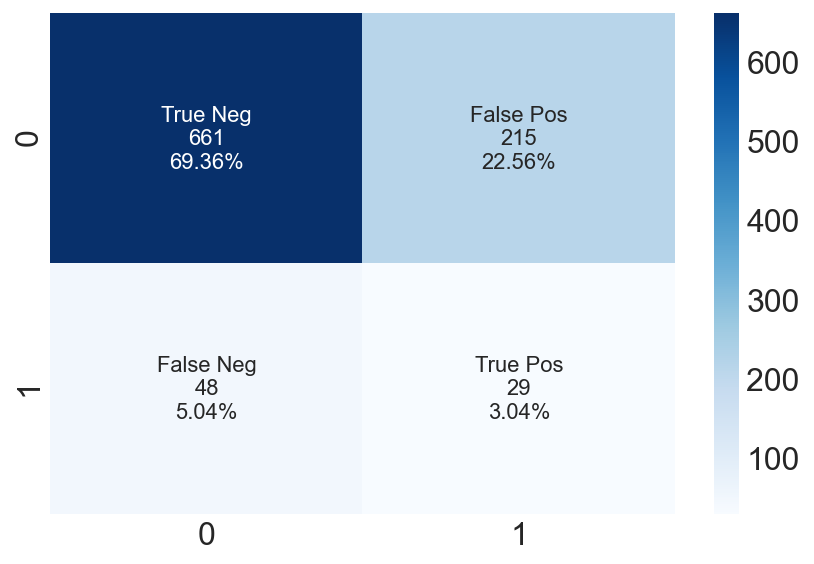

In [66]:
confusion_matrix_plot(y_test, dt_pred);

In [67]:
def aoc_recall_curve(classifier, clf_pred_proba):
    sns.set_context('talk')
    fig, axList = plt.subplots(ncols=2)
    fig.set_size_inches(13, 5)

    clf_pred_proba = classifier.predict_proba(X_test)

    # Plot the ROC-AUC curve
    ax = axList[0]

    fpr, tpr, thresholds = roc_curve(y_test, clf_pred_proba[:,1])
    auc_roc_dt = metrics.roc_auc_score(y_test, clf_pred_proba[:,1])
    ax.plot(fpr, tpr, linewidth=2, color = 'red')
    # It is customary to draw a diagonal dotted line in ROC plots.
    # This is to indicate completely random prediction. Deviation from this
    # dotted line towards the upper left corner signifies the power of the model.
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=1.1)
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title= 'ROC curve (AUC = %0.2f)' % auc_roc_dt
           #label = 'DT (AUC = %0.2f)' % auc_roc_dt
          )
    ax.grid(False)

    # Plot the precision-recall curve
    ax = axList[1]

    precision, recall, _ = precision_recall_curve(y_test, clf_pred_proba[:,1])
    ax.plot(recall, precision, linewidth=2)
    ax.set(xlabel='Recall', ylabel='Precision',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='Precision-Recall curve')
    ax.grid(False)

    plt.tight_layout()

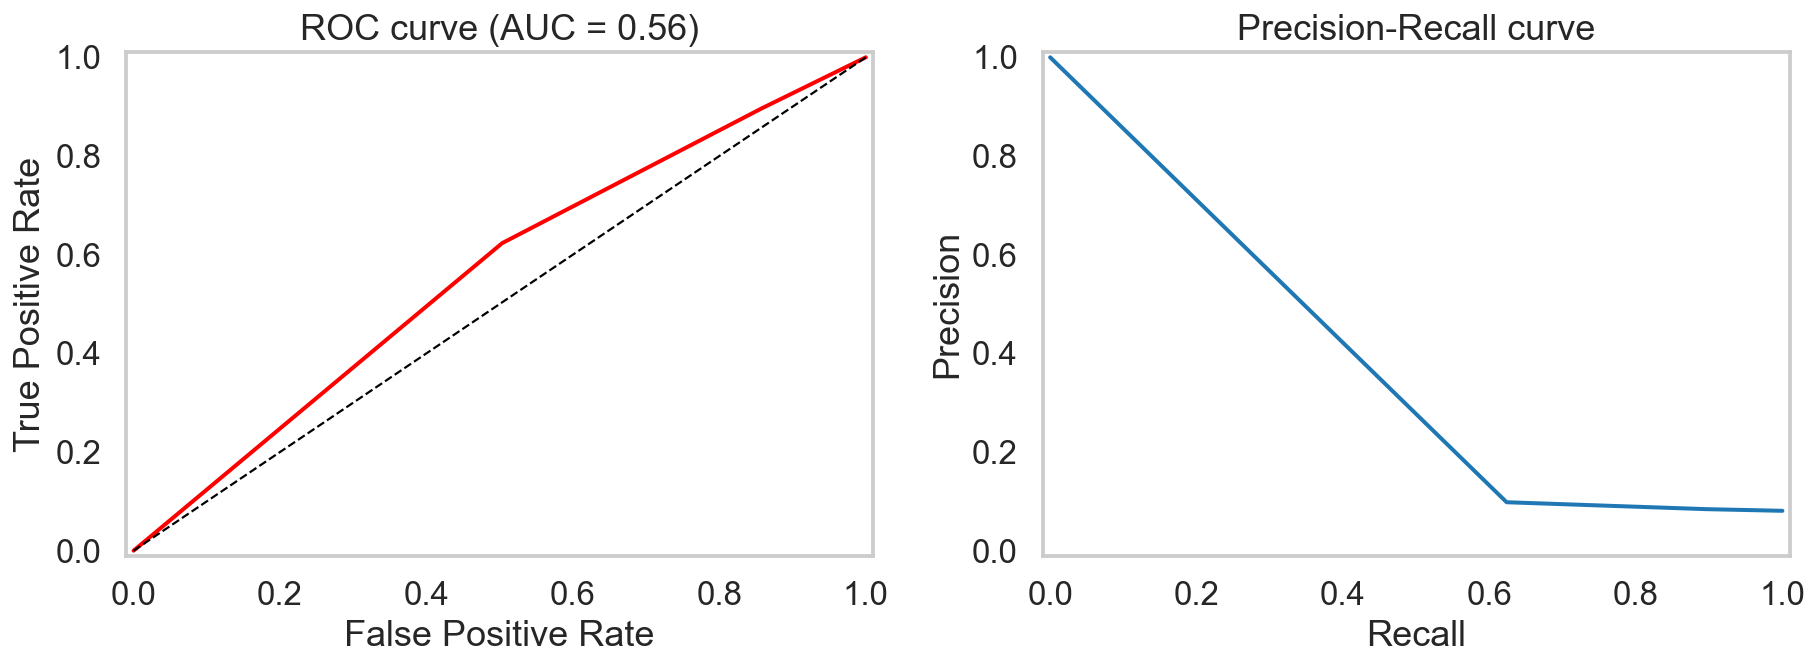

In [68]:
dt_pred_proba = clf_tree.predict_proba(X_test)[:,1]
aoc_recall_curve(clf_tree, dt_pred_proba)

##### Logistic Regression

In [69]:
logreg = LogisticRegression(max_iter=5000, random_state=2021)
clf_logreg = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('logreg', logreg)])

params_logreg = {'logreg__C':[0.01, 0.1, 1, 5, 10, 20, 30], 
                 'logreg__penalty':['l2','l1'],
                 'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                }

clf_logreg = RandomizedSearchCV(estimator=clf_logreg, 
                            param_distributions = params_logreg, 
                            cv=10, 
                            scoring= 'recall', 
                            n_jobs = -1, 
                            return_train_score=True, 
                            random_state=2021)

clf_logreg.fit(X_train, y_train);

print('Final score on training-set is: ', clf_logreg.score(X_train, y_train))
print('Final score on test-set is: ', clf_logreg.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_logreg.best_params_)

Final score on training-set is:  0.591304347826087
Final score on test-set is:  0.4805194805194805
 

Best params:
 {'logreg__solver': 'sag', 'logreg__penalty': 'l2', 'logreg__C': 0.01}


In [70]:
final_model_logreg = LogisticRegression(random_state=2021, 
                                        solver = "sag", 
                                        penalty = 'l2',
                                        C = 10)

clf_logreg = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('logreg', final_model_logreg)])
clf_logreg.fit(X_train, y_train)

print("Report:")
logreg_pred = clf_logreg.predict(X_test)

logreg_pred = clf_logreg.predict(X_test)
logreg_accuracy = round(metrics.accuracy_score(y_test, logreg_pred),4)
print ('The Accuracy of the LR-model is: {}'.format(logreg_accuracy))
print (' ')
print(classification_report(y_test, logreg_pred))

Report:
The Accuracy of the LR-model is: 0.6212
 
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       876
           1       0.09      0.43      0.15        77

    accuracy                           0.62       953
   macro avg       0.51      0.53      0.46       953
weighted avg       0.86      0.62      0.71       953



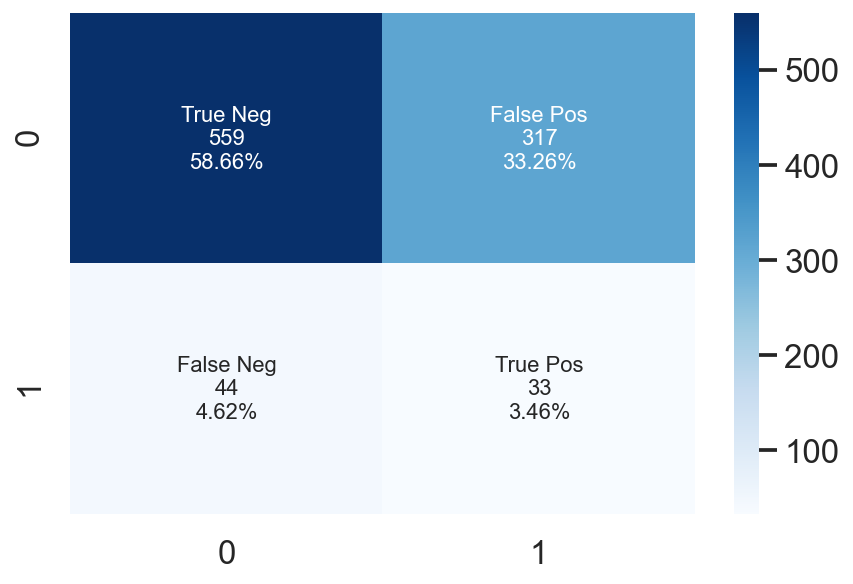

In [71]:
confusion_matrix_plot(y_test, logreg_pred);

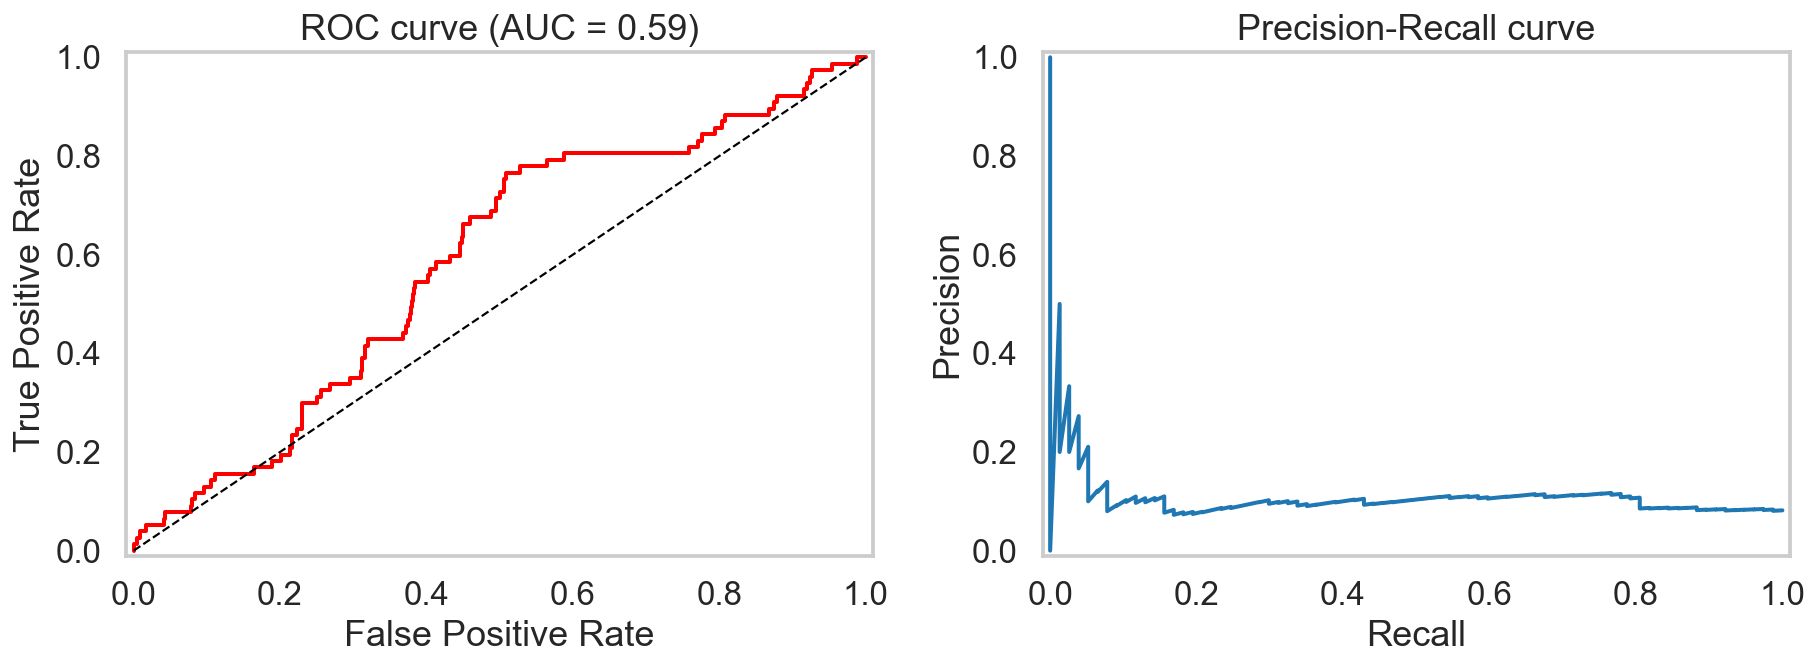

In [72]:
logreg_pred_proba = clf_logreg.predict_proba(X_test)[:,1]
aoc_recall_curve(clf_logreg, logreg_pred_proba)

##### LGBM

In [73]:
lgbm = LGBMClassifier(iterations=100, random_state = 2021)
clf_lgbm = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('lgbm', lgbm)])

params_lgbm = {'lgbm__reg__alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
               'lgbm__min__child__weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
               'lgbm__reg__lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
              }

clf_lgbm = RandomizedSearchCV(estimator=clf_lgbm, 
                            param_distributions=params_lgbm, 
                            cv=10, 
                            scoring= 'recall', 
                            n_jobs = -1, 
                            return_train_score=True, 
                            random_state=2021)

clf_lgbm.fit(X_train, y_train);

print('Final score on training-set is: ', clf_lgbm.score(X_train, y_train))
print('Final score on test-set is: ', clf_lgbm.score(X_test, y_test))

print (' ')
print('\nBest params:\n', clf_lgbm.best_params_)

[LightGBM] [Warning] Unknown parameter: min__child__weight
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: reg__lambda
[LightGBM] [Warning] Unknown parameter: reg__alpha
Final score on training-set is:  0.9608695652173913
Final score on test-set is:  0.03896103896103896
 

Best params:
 {'lgbm__reg__lambda': 10, 'lgbm__reg__alpha': 7, 'lgbm__min__child__weight': 0.1}


In [74]:
final_model_lgbm = LGBMClassifier(reg_alpha=7, 
                                  reg_lambda = 10,
                                  min_child_weight = 0.1,
                                  random_state=2021)

clf_lgbm = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('lgbm', final_model_lgbm)])
clf_lgbm.fit(X_train, y_train)

print("Report:")
lgbm_pred = clf_lgbm.predict(X_test)
lgbm_accuracy = round(metrics.accuracy_score(y_test, lgbm_pred), 4)
print ('The Accuracy of the LGBM-model is: {}'.format(lgbm_accuracy))
print (' ')
print(classification_report(y_test, lgbm_pred))

Report:
The Accuracy of the LGBM-model is: 0.915
 
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       876
           1       0.17      0.01      0.02        77

    accuracy                           0.92       953
   macro avg       0.54      0.50      0.49       953
weighted avg       0.86      0.92      0.88       953



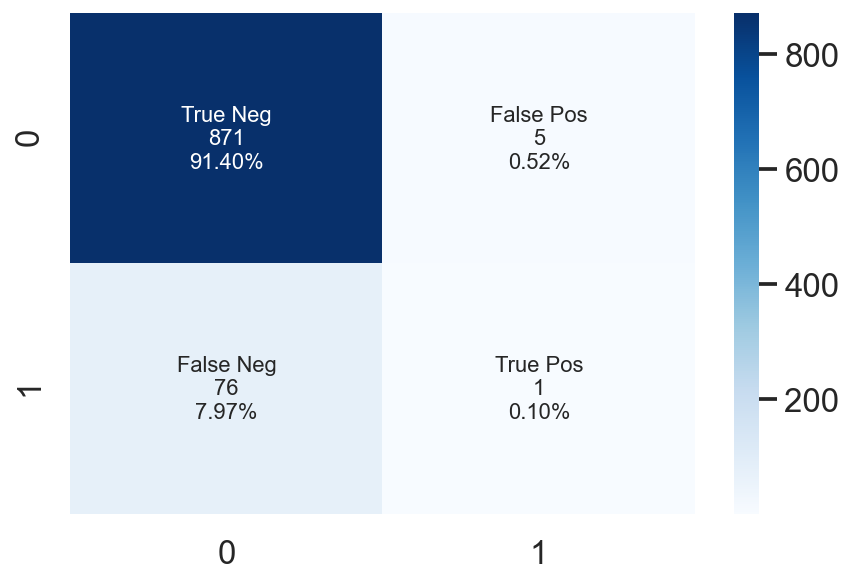

In [75]:
confusion_matrix_plot(y_test, lgbm_pred);

##### CatBoost

In [76]:
catb = CatBoostClassifier(verbose=False, iterations=100, random_state = 2021)
clf_catb = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('catb', catb)])

params_catb = {'catb__learning_rate': sp_randFloat(),
               'catb__subsample'    : sp_randFloat(),
               'catb__max_depth'    : sp_randInt(2, 10),
               'catb__iterations'    : sp_randInt(10, 100),
              }

clf_catb = RandomizedSearchCV(estimator=clf_catb, 
                            param_distributions=params_catb, 
                            cv=10, 
                            scoring= 'recall', 
                            n_jobs = -1, 
                            return_train_score=True, 
                            random_state=2021)

clf_catb.fit(X_train, y_train);

print('Final score on training-set is: ', clf_catb.score(X_train, y_train))
print('Final score on test-set is: ', clf_catb.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_catb.best_params_)

Final score on training-set is:  0.9
Final score on test-set is:  0.09090909090909091
 

Best params:
 {'catb__iterations': 54, 'catb__learning_rate': 0.9972432813403187, 'catb__max_depth': 5, 'catb__subsample': 0.8438159538730465}


In [77]:
final_model_cat = CatBoostClassifier(random_state=2021, 
                                     iterations = 54, 
                                     learning_rate = 0.9972432813403187,
                                     max_depth = 5,
                                     subsample = 0.8438159538730465,
                                     verbose = False
                                     )

clf_cat = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('catb', final_model_cat)])

clf_cat.fit(X_train, y_train)

print("Report:")
cat_pred = clf_cat.predict(X_test)
gnb_accuracy = round(metrics.accuracy_score(y_test, cat_pred), 4)
print ('The Accuracy of the CatBoost-model is: {}'.format(gnb_accuracy))
print (' ')
print(classification_report(y_test, cat_pred))

Report:
The Accuracy of the CatBoost-model is: 0.8846
 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       876
           1       0.15      0.09      0.11        77

    accuracy                           0.88       953
   macro avg       0.54      0.52      0.53       953
weighted avg       0.86      0.88      0.87       953



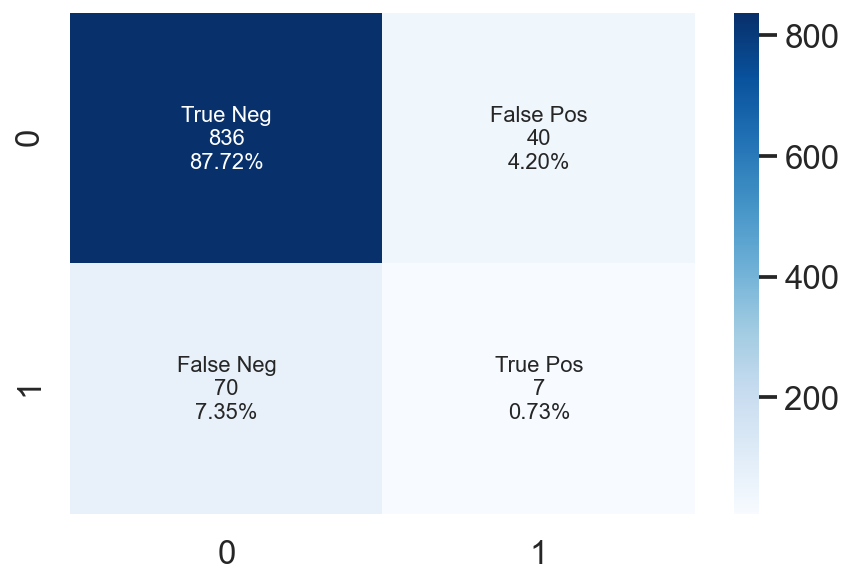

In [78]:
confusion_matrix_plot(y_test, cat_pred);

##### Random Forests

In [79]:
# https://github.com/vidhya-5684/German-Credit-Risk/blob/main/German_Credit_Risk.ipynb
rfc = RandomForestClassifier(random_state = 2021)
clf_rfc = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('rfc', rfc)])

param_grid_rfc = {'rfc__n_estimators': [10, 20, 50, 100, 150, 200, 500],
              'rfc__max_features': ['auto', 'sqrt', 'log2'],
              'rfc__max_depth' : [2, 3, 4, 5, 6, 7, 8],
              'rfc__criterion' :['gini', 'entropy']
             }

clf_rfc = RandomizedSearchCV(estimator=clf_rfc, 
                            param_distributions=param_grid_rfc, 
                            cv=10, 
                            scoring= 'recall', 
                            n_jobs = -1, 
                            return_train_score=True, 
                            random_state=2021)

clf_rfc.fit(X_train, y_train);

print('Final score on training-set is: ', clf_rfc.score(X_train, y_train))
print('Final score on test-set is: ', clf_rfc.score(X_test, y_test))
print (' ')
print('\nBest params:\n', clf_rfc.best_params_)

Final score on training-set is:  0.5
Final score on test-set is:  0.37662337662337664
 

Best params:
 {'rfc__n_estimators': 20, 'rfc__max_features': 'auto', 'rfc__max_depth': 3, 'rfc__criterion': 'gini'}


In [80]:
final_model_rfc = RandomForestClassifier(random_state=2021, 
                                         n_estimators = 500, 
                                         max_features = 'log2',
                                         max_depth = 3,
                                         criterion = 'gini'
                                        )

clf_rfc = Pipeline([('preprocessor', preprocessor), ('smt', smt), ('rfc', final_model_rfc)])

clf_rfc.fit(X_train, y_train)

print("Report:")
rfc_pred = clf_rfc.predict(X_test)
rfc_accuracy = round(metrics.accuracy_score(y_test, rfc_pred), 4)
print ('The Accuracy of the CatBoost-model is: {}'.format(rfc_accuracy))
print (' ')
print(classification_report(y_test, rfc_pred))

Report:
The Accuracy of the CatBoost-model is: 0.7524
 
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       876
           1       0.12      0.34      0.18        77

    accuracy                           0.75       953
   macro avg       0.53      0.56      0.52       953
weighted avg       0.87      0.75      0.80       953



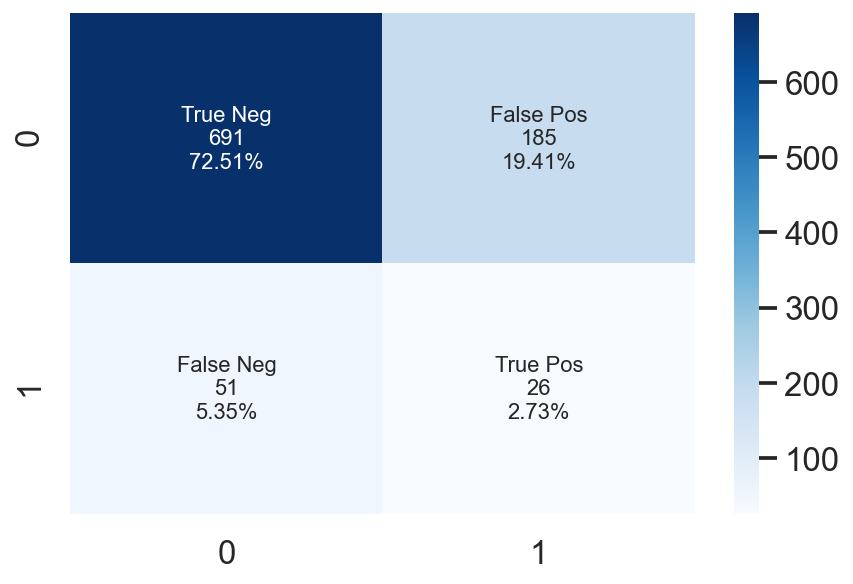

In [81]:
confusion_matrix_plot(y_test, rfc_pred);

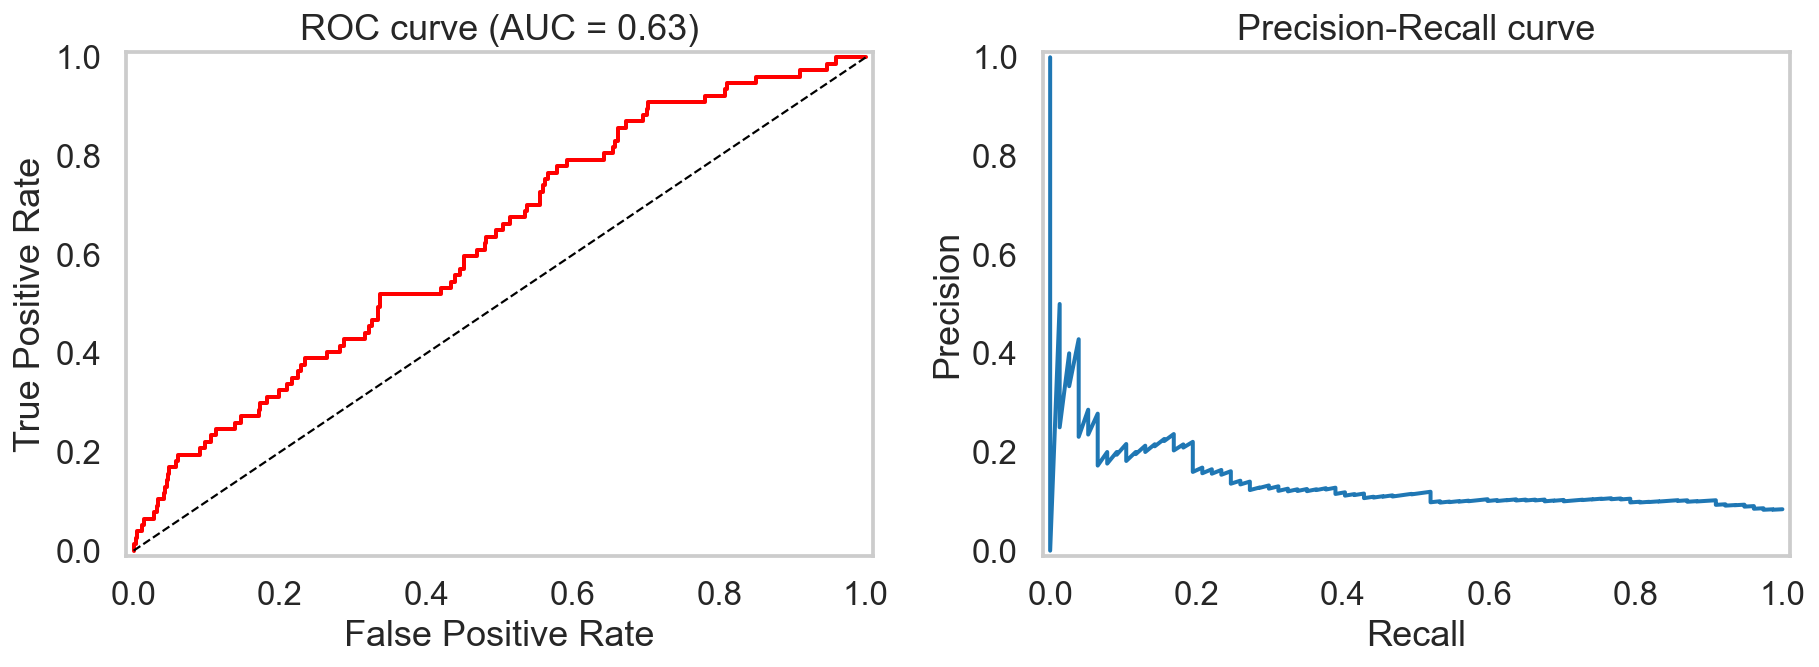

In [82]:
rfc_pred_proba = clf_rfc.predict_proba(X_test)[:,1]
aoc_recall_curve(clf_rfc, rfc_pred_proba)

### 3. Plots combined

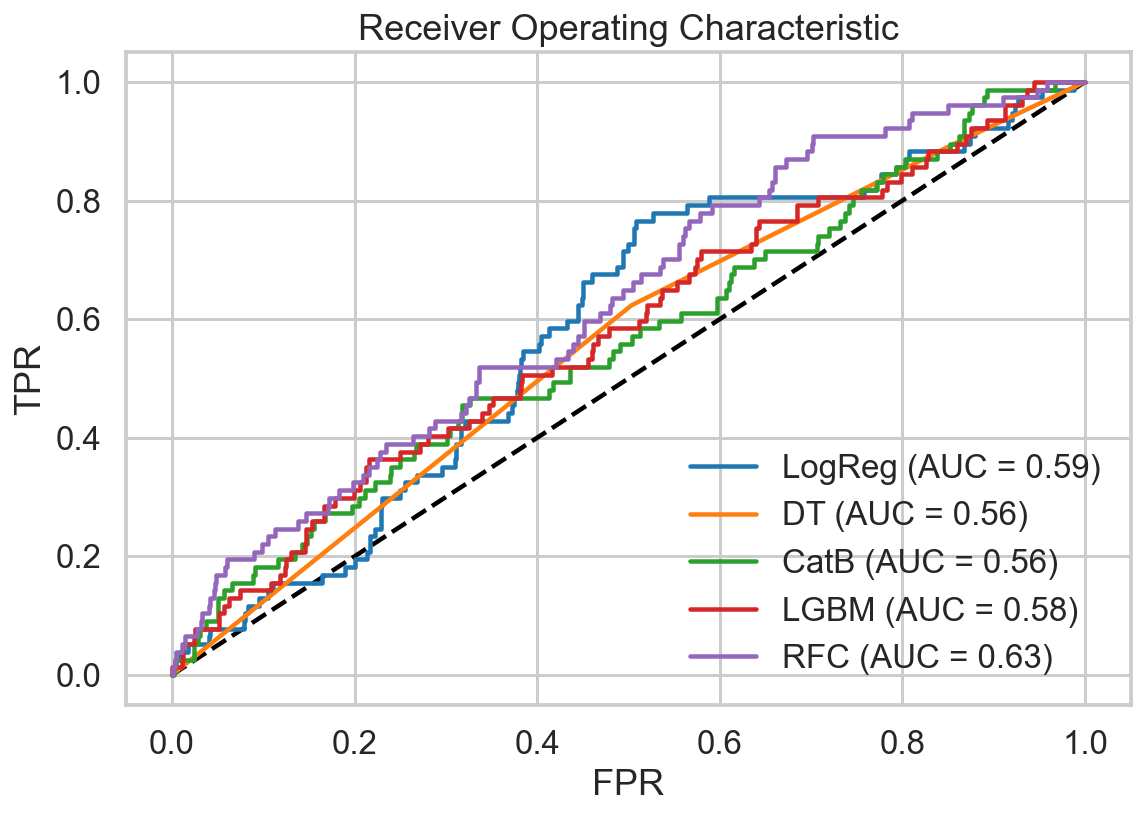

In [83]:
plt.rcParams["figure.figsize"] = (9,6)
logreg_pred_proba = clf_logreg.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, logreg_pred_proba)
auc_roc_logreg = metrics.roc_auc_score(y_test, logreg_pred_proba)

dt_pred_proba = clf_tree.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, dt_pred_proba)
auc_roc_dt = metrics.roc_auc_score(y_test, dt_pred_proba)

cat_pred_proba = clf_cat.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, cat_pred_proba)
auc_roc_cat = metrics.roc_auc_score(y_test, cat_pred_proba)

lgbm_pred_proba = clf_lgbm.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, lgbm_pred_proba)
auc_roc_lgbm = metrics.roc_auc_score(y_test, lgbm_pred_proba)

rfc_pred_proba = clf_rfc.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, rfc_pred_proba)
auc_roc_rfc = metrics.roc_auc_score(y_test, rfc_pred_proba)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label = 'LogReg (AUC = %0.2f)' % auc_roc_logreg)
plt.plot(fpr2, tpr2, label = 'DT (AUC = %0.2f)' % auc_roc_dt)
plt.plot(fpr3, tpr3, label = 'CatB (AUC = %0.2f)' % auc_roc_cat)
plt.plot(fpr4, tpr4, label = 'LGBM (AUC = %0.2f)' % auc_roc_lgbm)
plt.plot(fpr5, tpr5, label = 'RFC (AUC = %0.2f)' % auc_roc_rfc)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()